![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Feature Engineering

In this lab, you will use learningSet.csv file which you have already cloned in the previous activities.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import random
import string
import seaborn as sns

In [2]:
data = pd.read_csv('learningSet.csv')

C:\Users\duart\AppData\Local\Temp\ipykernel_21996\3673836359.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('learningSet.csv')


In [3]:
print(data.shape)

(95412, 481)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Columns: 481 entries, ODATEDW to GEOCODE2
dtypes: float64(97), int64(310), object(74)
memory usage: 350.1+ MB


In [5]:
data.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,,,,XXXX,T2,36,60.0,,,,,,,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.

In [6]:
data.columns = data.columns.str.lower()

## Instructions

Here we will work on cleaning some of the other columns in the dataset using the techniques that we used before in the lessons.

### Check for null values in the numerical columns.

In [7]:
numerical = data.select_dtypes(np.number)
numerical = numerical.drop(columns = ['target_b', 'target_d'])

In [8]:
numerical.head()

,odatedw,tcode,dob,age,numchld,income,wealth1,hit,mbcraft,mbgarden,mbbooks,mbcolect,magfaml,magfem,magmale,pubgardn,pubculin,pubhlth,pubdoity,pubnewfn,pubphoto,pubopp,malemili,malevet,vietvets,wwiivets,localgov,stategov,fedgov,wealth2,pop901,pop902,pop903,pop90c1,pop90c2,pop90c3,pop90c4,pop90c5,eth1,eth2,eth3,eth4,eth5,eth6,eth7,eth8,eth9,eth10,eth11,eth12,eth13,eth14,eth15,eth16,age901,age902,age903,age904,age905,age906,age907,chil1,chil2,chil3,agec1,agec2,agec3,agec4,agec5,agec6,agec7,chilc1,chilc2,chilc3,chilc4,chilc5,hhage1,hhage2,hhage3,hhn1,hhn2,hhn3,hhn4,hhn5,hhn6,marr1,marr2,marr3,marr4,hhp1,hhp2,dw1,dw2,dw3,dw4,dw5,dw6,dw7,dw8,dw9,hv1,hv2,hv3,hv4,hu1,hu2,hu3,hu4,hu5,hhd1,hhd2,hhd3,hhd4,hhd5,hhd6,hhd7,hhd8,hhd9,hhd10,hhd11,hhd12,ethc1,ethc2,ethc3,ethc4,ethc5,ethc6,hvp1,hvp2,hvp3,hvp4,hvp5,hvp6,hur1,hur2,rhp1,rhp2,rhp3,rhp4,hupa1,hupa2,hupa3,hupa4,hupa5,hupa6,hupa7,rp1,rp2,rp3,rp4,msa,adi,dma,ic1,ic2,ic3,ic4,ic5,ic6,ic7,ic8,ic9,ic10,ic11,ic12,ic13,ic14,ic15,ic16,ic17,ic18,ic19,ic20,ic21,ic22,ic23,hhas1,hhas2,hhas3,hhas4,mc1,mc2,mc3,tpe1,tpe2,tpe3,tpe4,tpe5,tpe6,tpe7,tpe8,tpe9,pec1,pec2,tpe10,tpe11,tpe12,tpe13,lfc1,lfc2,lfc3,lfc4,lfc5,lfc6,lfc7,lfc8,lfc9,lfc10,occ1,occ2,occ3,occ4,occ5,occ6,occ7,occ8,occ9,occ10,occ11,occ12,occ13,eic1,eic2,eic3,eic4,eic5,eic6,eic7,eic8,eic9,eic10,eic11,eic12,eic13,eic14,eic15,eic16,oedc1,oedc2,oedc3,oedc4,oedc5,oedc6,oedc7,ec1,ec2,ec3,ec4,ec5,ec6,ec7,ec8,sec1,sec2,sec3,sec4,sec5,afc1,afc2,afc3,afc4,afc5,afc6,vc1,vc2,vc3,vc4,anc1,anc2,anc3,anc4,anc5,anc6,anc7,anc8,anc9,anc10,anc11,anc12,anc13,anc14,anc15,pobc1,pobc2,lsc1,lsc2,lsc3,lsc4,voc1,voc2,voc3,hc1,hc2,hc3,hc4,hc5,hc6,hc7,hc8,hc9,hc10,hc11,hc12,hc13,hc14,hc15,hc16,hc17,hc18,hc19,hc20,hc21,mhuc1,mhuc2,ac1,ac2,adate_2,adate_3,adate_4,adate_5,adate_6,adate_7,adate_8,adate_9,adate_10,adate_11,adate_12,adate_13,adate_14,adate_15,adate_16,adate_17,adate_18,adate_19,adate_20,adate_21,adate_22,adate_23,adate_24,cardprom,maxadate,numprom,cardpm12,numprm12,rdate_3,rdate_4,rdate_5,rdate_6,rdate_7,rdate_8,rdate_9,rdate_10,rdate_11,rdate_12,rdate_13,rdate_14,rdate_15,rdate_16,rdate_17,rdate_18,rdate_19,rdate_20,rdate_21,rdate_22,rdate_23,rdate_24,ramnt_3,ramnt_4,ramnt_5,ramnt_6,ramnt_7,ramnt_8,ramnt_9,ramnt_10,ramnt_11,ramnt_12,ramnt_13,ramnt_14,ramnt_15,ramnt_16,ramnt_17,ramnt_18,ramnt_19,ramnt_20,ramnt_21,ramnt_22,ramnt_23,ramnt_24,ramntall,ngiftall,cardgift,minramnt,minrdate,maxramnt,maxrdate,lastgift,lastdate,fistdate,nextdate,timelag,avggift,controln,hphone_d,rfa_2f,cluster2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9510.0,9508.0,9507.0,9506.0,9504.0,9503.0,9502.0,9501.0,9411.0,9411.0,9410.0,9409.0,9407.0,9406.0,27,9702,74,6,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9512.0,NaN,NaN,NaN,9507.0,9505.0,9505.0,9503.0,NaN,NaN,NaN,NaN,NaN,9408.0,9406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,10.0,11.0,11.0,11.0,NaN,NaN,NaN,NaN,NaN,11.0,9.0,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,4

In [9]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Columns: 405 entries, odatedw to cluster2
dtypes: float64(96), int64(309)
memory usage: 294.8 MB


In [10]:
numerical_with_null = numerical.isnull().sum()
numerical_with_null

odatedw         0
tcode           0
dob             0
age         23665
numchld     83026
            ...  
avggift         0
controln        0
hphone_d        0
rfa_2f          0
cluster2      132
Length: 405, dtype: int64

In [11]:
nulls_percent_df = pd.DataFrame(numerical.isna().sum()/len(numerical)).reset_index() #creating an index
#we are dividing isnull values by the total values and creating a new df with them to look for them
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,odatedw,0.000000
1,tcode,0.000000
2,dob,0.000000
3,age,0.248030
4,numchld,0.870184
...,...,...
400,avggift,0.000000
401,controln,0.000000
402,hphone_d,0.000000
403,rfa_2f,0.000000


In [12]:
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0] 

,column_name,nulls_percentage
3,age,0.248030
4,numchld,0.870184
5,income,0.223096
6,wealth1,0.468830
8,mbcraft,0.553955
...,...,...
386,ramnt_23,0.917631
387,ramnt_24,0.814090
398,nextdate,0.104526
399,timelag,0.104526


### Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.

#### GEOCODE2

In [13]:
data['geocode2'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 95412 entries, 0 to 95411
Series name: geocode2
Non-Null Count  Dtype 
--------------  ----- 
95280 non-null  object
dtypes: object(1)
memory usage: 745.5+ KB


In [14]:
data['geocode2'].unique()

array(['C', 'A', 'D', 'B', ' ', nan], dtype=object)

In [15]:
data['geocode2'].value_counts()

A    34484
B    28505
D    16580
C    15524
       187
Name: geocode2, dtype: int64

In [16]:
geo =list(data[(data['geocode2'].isin(['A', 'B', 'C', 'D']) == False) & (data['geocode2'])]['geocode2'].index)
data.iloc[geo,list(data.columns).index("geocode2")] = "A"

In [17]:
data['geocode2'].value_counts()

A    34671
B    28505
D    16580
C    15524
Name: geocode2, dtype: int64

In [18]:
data['geocode2'].unique()

array(['C', 'A', 'D', 'B', nan], dtype=object)

In [19]:
nan_count = data['geocode2'].isna().sum()
nan_count

132

In [20]:
mode_value = data['geocode2'].mode()[0]
data['geocode2'] = data['geocode2'].fillna(mode_value)

In [21]:
data['geocode2'].unique()

array(['C', 'A', 'D', 'B'], dtype=object)

In [22]:
data['geocode2'].value_counts()

A    34803
B    28505
D    16580
C    15524
Name: geocode2, dtype: int64

#### WEALTH1

In [23]:
data['wealth1'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 95412 entries, 0 to 95411
Series name: wealth1
Non-Null Count  Dtype  
--------------  -----  
50680 non-null  float64
dtypes: float64(1)
memory usage: 745.5 KB


In [24]:
data['wealth1'].unique()

array([nan,  9.,  1.,  4.,  2.,  6.,  0.,  5.,  8.,  3.,  7.])

In [25]:
data['wealth1'].value_counts()

9.0    7585
8.0    6793
7.0    6198
6.0    5825
5.0    5280
4.0    4810
3.0    4237
2.0    4085
1.0    3454
0.0    2413
Name: wealth1, dtype: int64

In [26]:
nan_count1 = data['wealth1'].isna().sum()
nan_count1

44732

In [27]:
data['wealth1'] = data["wealth1"].fillna((data['wealth1'].median()))

In [28]:
nan_count1 = data['wealth1'].isna().sum()
nan_count1

0

In [29]:
data['wealth1'].value_counts()

6.0    50557
9.0     7585
8.0     6793
7.0     6198
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: wealth1, dtype: int64

#### ADI

In [30]:
data['adi'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 95412 entries, 0 to 95411
Series name: adi
Non-Null Count  Dtype  
--------------  -----  
95280 non-null  float64
dtypes: float64(1)
memory usage: 745.5 KB


In [31]:
data['adi'].unique()

array([177.,  13., 281.,  67., 127., 185.,  91., 251., 391., 181., 269.,
        83., 107., 249., 291.,  57., 227., 329., 351.,  55., 133.,  51.,
        73., 159., 201.,  75., 233., 591., 203., 175.,  59., 105., 111.,
       173., 415., 323., 187.,  65., 412., 109., 425., 405., 197., 279.,
       645., 207.,  89., 361., 209., 213.,  15.,  21., 113., 131., 469.,
       199., 129., 441., 459., 235., 301.,  39., 429., 285., 245., 335.,
       393., 577., 439., 455., 383., 263.,   0., 427., 307., 275., 119.,
       229., 273., 325., 371., 377., 315., 342., 421., 219.,  61.,  93.,
       375., 283., 381., 243., 353., 613., 339., 367., 417., 299., 271.,
       157.,  77., 327.,  53.,  87., 451., 627.,  71., 253., 363., 403.,
       115., 389.,  63., 321., 448., 237., 217., 241., 123., 221., 165.,
       277.,  85., 319., 247.,  69., 379.,  95.,  17., 625., 462., 303.,
       179., 331., 231., 337., 257., 409., 457., 359., 373.,  nan, 413.,
       215., 205., 313., 211., 305., 355., 419., 47

In [32]:
data['adi'].value_counts()

13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: adi, Length: 204, dtype: int64

In [33]:
nan_count1 = data['adi'].isna().sum()
nan_count1

132

In [34]:
mode_value = data['adi'].mode()[0]
data['adi'] = data['adi'].fillna(mode_value)

In [35]:
nan_count1 = data['adi'].isna().sum()
nan_count1

0

In [36]:
data['adi'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 95412 entries, 0 to 95411
Series name: adi
Non-Null Count  Dtype  
--------------  -----  
95412 non-null  float64
dtypes: float64(1)
memory usage: 745.5 KB


#### DMA

In [37]:
data['dma'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 95412 entries, 0 to 95411
Series name: dma
Non-Null Count  Dtype  
--------------  -----  
95280 non-null  float64
dtypes: float64(1)
memory usage: 745.5 KB


In [38]:
data['dma'].unique()

array([682., 803., 518., 862., 528., 691., 509., 643., 624., 659., 671.,
       527., 613., 716., 770., 505., 717., 534., 560., 547., 571., 602.,
       800., 638., 618., 609., 820., 821., 635., 675., 563., 819., 617.,
       637., 606., 709., 632., 807., 698., 623., 507., 627., 524., 517.,
       539., 649., 868., 546., 529., 567., 825., 512., 669., 764., 575.,
       548., 662., 811., 801., 652., 771., 603., 556., 622., 561., 724.,
       804., 633., 839., 686., 650., 743., 619., 678., 753., 610., 745.,
       604., 749., 670., 765., 711., 553., 762., 520., 503., 551., 515.,
       647., 544.,   0., 676., 752., 545., 754., 810., 790., 656., 755.,
       641., 616., 628., 588., 581., 540., 658., 583., 866., 642., 746.,
       634., 648., 705., 725., 744., 513., 612., 813., 531., 751., 500.,
       630., 611., 789., 582., 693., 692., 828., 626., 710., 542., 855.,
       687., 679., 640., 722., 620., 881., 564., 522., 756., 570., 718.,
        nan, 530., 557., 625., 541., 657., 631., 55

In [39]:
data['dma'].value_counts()

803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: dma, Length: 206, dtype: int64

In [40]:
nan_count1 = data['dma'].isna().sum()
nan_count1

132

In [41]:
mode_value = data['dma'].mode()[0]
data['dma'] = data['dma'].fillna(mode_value)

In [42]:
nan_count1 = data['dma'].isna().sum()
nan_count1

0

In [43]:
data['dma'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 95412 entries, 0 to 95411
Series name: dma
Non-Null Count  Dtype  
--------------  -----  
95412 non-null  float64
dtypes: float64(1)
memory usage: 745.5 KB


#### MSA

In [44]:
data['msa'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 95412 entries, 0 to 95411
Series name: msa
Non-Null Count  Dtype  
--------------  -----  
95280 non-null  float64
dtypes: float64(1)
memory usage: 745.5 KB


In [45]:
data['msa'].unique()

array([   0., 4480., 9340., 5000., 2030., 3960., 5360., 3480.,  760.,
       2160., 5960., 5120.,  440., 6580., 1600.,  680., 3360., 7040.,
       2920., 3120., 6440.,  640., 6120., 3000., 7600., 2680., 5080.,
       1360., 2180., 4420., 1960., 6640., 7360., 5945., 1920., 1145.,
       7520., 2800., 1520., 7510., 1620., 4520., 7320.,  720., 4720.,
       1560., 8960.,   40., 6720.,  520., 9360., 3710., 8280., 6760.,
       3160., 5560., 3600., 6780., 5800., 4120., 5160., 5880.,  380.,
       3440., 2710., 2020., 9040., 6200., 6880., 6920., 2760., 7080.,
       4080., 2580., 4100., 5790., 4200.,  600., 4680., 4040., 1640.,
       5775., 8720., 3980., 2240., 1720., 5910., 9260.,  200., 7400.,
       1020., 3290., 2720., 7240., 3800., 8120.,  870., 2320., 3760.,
       1040., 2840., 3880.,  920., 6080.,  460.,  320., 1400., 3320.,
       2640., 8200., 4890., 3660., 2670., 1000., 2520., 2440., 8520.,
       3720., 2080., 7500., 3920., 1125., 4400.,  840., 7485., 8750.,
       8735., 1150.,

In [46]:
data['msa'].value_counts()

0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: msa, Length: 298, dtype: int64

In [47]:
nan_count1 = data['msa'].isna().sum()
nan_count1

132

In [48]:
mode_value = data['msa'].mode()[0]
data['msa'] = data['msa'].fillna(mode_value)

In [49]:
nan_count1 = data['msa'].isna().sum()
nan_count1

0

In [50]:
data['msa'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 95412 entries, 0 to 95411
Series name: msa
Non-Null Count  Dtype  
--------------  -----  
95412 non-null  float64
dtypes: float64(1)
memory usage: 745.5 KB


### Use appropriate EDA technique where ever necessary.

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Columns: 481 entries, odatedw to geocode2
dtypes: float64(97), int64(310), object(74)
memory usage: 350.1+ MB


In [52]:
data_na = data.isna().sum()

data_na = pd.DataFrame({'name': data_na.index, 'count_nan': data_na.values})

data_na = data_na[data_na['count_nan'] > 0]

In [53]:
data_na

,name,count_nan
16,age,23665
23,numchld,83026
24,income,21286
28,mbcraft,52854
29,mbgarden,52854
...,...,...
454,ramnt_23,87553
455,ramnt_24,77674
466,nextdate,9973
467,timelag,9973


In [54]:
data_na = data_na.sort_values(by='count_nan', ascending=False)

In [55]:
data_na['percentage_nan'] = (data_na['count_nan'] / len(data) * 100)

In [56]:
data_na

,name,count_nan,percentage_nan
436,ramnt_5,95403,99.990567
414,rdate_5,95403,99.990567
412,rdate_3,95170,99.746363
434,ramnt_3,95170,99.746363
413,rdate_4,95131,99.705488
...,...,...,...
365,adate_6,3557,3.728043
367,adate_8,3511,3.679831
363,adate_4,2191,2.296357
362,adate_3,1950,2.043768


In [57]:
columns_to_drop = data_na[data_na['percentage_nan'] > 50]
columns_to_drop

,name,count_nan,percentage_nan
436,ramnt_5,95403,99.990567
414,rdate_5,95403,99.990567
412,rdate_3,95170,99.746363
434,ramnt_3,95170,99.746363
413,rdate_4,95131,99.705488
...,...,...,...
37,pubhlth,52854,55.395548
38,pubdoity,52854,55.395548
39,pubnewfn,52854,55.395548
40,pubphoto,52854,55.395548


In [58]:
columns_to_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 436 to 379
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            62 non-null     object 
 1   count_nan       62 non-null     int64  
 2   percentage_nan  62 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.9+ KB


In [59]:
data = data.drop(columns_to_drop['name'], axis=1)

In [60]:
data

,odatedw,osource,tcode,state,zip,mailcode,pvastate,dob,noexch,recinhse,recp3,recpgvg,recsweep,mdmaud,domain,cluster,age,ageflag,homeownr,child03,child07,child12,child18,income,gender,wealth1,hit,datasrce,malemili,malevet,vietvets,wwiivets,localgov,stategov,fedgov,solp3,solih,major,wealth2,geocode,collect1,veterans,bible,catlg,homee,pets,cdplay,stereo,pcowners,photo,crafts,fisher,gardenin,boats,walker,kidstuff,cards,plates,lifesrc,pepstrfl,pop901,pop902,pop903,pop90c1,pop90c2,pop90c3,pop90c4,pop90c5,eth1,eth2,eth3,eth4,eth5,eth6,eth7,eth8,eth9,eth10,eth11,eth12,eth13,eth14,eth15,eth16,age901,age902,age903,age904,age905,age906,age907,chil1,chil2,chil3,agec1,agec2,agec3,agec4,agec5,agec6,agec7,chilc1,chilc2,chilc3,chilc4,chilc5,hhage1,hhage2,hhage3,hhn1,hhn2,hhn3,hhn4,hhn5,hhn6,marr1,marr2,marr3,marr4,hhp1,hhp2,dw1,dw2,dw3,dw4,dw5,dw6,dw7,dw8,dw9,hv1,hv2,hv3,hv4,hu1,hu2,hu3,hu4,hu5,hhd1,hhd2,hhd3,hhd4,hhd5,hhd6,hhd7,hhd8,hhd9,hhd10,hhd11,hhd12,ethc1,ethc2,ethc3,ethc4,ethc5,ethc6,hvp1,hvp2,hvp3,hvp4,hvp5,hvp6,hur1,hur2,rhp1,rhp2,rhp3,rhp4,hupa1,hupa2,hupa3,hupa4,hupa5,hupa6,hupa7,rp1,rp2,rp3,rp4,msa,adi,dma,ic1,ic2,ic3,ic4,ic5,ic6,ic7,ic8,ic9,ic10,ic11,ic12,ic13,ic14,ic15,ic16,ic17,ic18,ic19,ic20,ic21,ic22,ic23,hhas1,hhas2,hhas3,hhas4,mc1,mc2,mc3,tpe1,tpe2,tpe3,tpe4,tpe5,tpe6,tpe7,tpe8,tpe9,pec1,pec2,tpe10,tpe11,tpe12,tpe13,lfc1,lfc2,lfc3,lfc4,lfc5,lfc6,lfc7,lfc8,lfc9,lfc10,occ1,occ2,occ3,occ4,occ5,occ6,occ7,occ8,occ9,occ10,occ11,occ12,occ13,eic1,eic2,eic3,eic4,eic5,eic6,eic7,eic8,eic9,eic10,eic11,eic12,eic13,eic14,eic15,eic16,oedc1,oedc2,oedc3,oedc4,oedc5,oedc6,oedc7,ec1,ec2,ec3,ec4,ec5,ec6,ec7,ec8,sec1,sec2,sec3,sec4,sec5,afc1,afc2,afc3,afc4,afc5,afc6,vc1,vc2,vc3,vc4,anc1,anc2,anc3,anc4,anc5,anc6,anc7,anc8,anc9,anc10,anc11,anc12,anc13,anc14,anc15,pobc1,pobc2,lsc1,lsc2,lsc3,lsc4,voc1,voc2,voc3,hc1,hc2,hc3,hc4,hc5,hc6,hc7,hc8,hc9,hc10,hc11,hc12,hc13,hc14,hc15,hc16,hc17,hc18,hc19,hc20,hc21,mhuc1,mhuc2,ac1,ac2,adate_2,adate_3,adate_4,adate_5,adate_6,adate_7,adate_8,adate_9,adate_10,adate_11,adate_12,adate_13,adate_14,adate_16,adate_17,adate_18,adate_19,adate_21,adate_22,adate_24,rfa_2,rfa_3,rfa_4,rfa_5,rfa_6,rfa_7,rfa_8,rfa_9,rfa_10,rfa_11,rfa_12,rfa_13,rfa_14,rfa_15,rfa_16,rfa_17,rfa_18,rfa_19,rfa_20,rfa_21,rfa_22,rfa_23,rfa_24,cardprom,maxadate,numprom,cardpm12,numprm12,ramntall,ngiftall,cardgift,minramnt,minrdate,maxramnt,maxrdate,lastgift,lastdate,fistdate,nextdate,timelag,avggift,controln,target_b,target_d,hphone_d,rfa_2r,rfa_2f,rfa_2a,mdmaud_r,mdmaud_f,mdmaud_a,cluster2,geocode2
0,8901,GRI,0,IL,61081,,,3712,0,,,,,XXXX,T2,36,60.0,,,,,,,NaN,F,6.0,0,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9510.0,9508.0,9507.0,9506.0,9503.0,9502.0,9501.0,9411.0,9410.0,9409.0,9406.0,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,,,,XXXX,S1,14,46.0,E,H,,,,M,6.0,M,9.0,16,3,0,15,55,11,6,2,1,,,,9.0,2,,,,,,,,,,,,,,,,,,,,,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4

In [61]:
def fill_empty_strings_with_unique(df) -> pd.DataFrame:
    """
    Fill empty strings in a DataFrame with unique values based on the existing data types in each column.

    Args:
        df (pandas.DataFrame): Input DataFrame with columns containing empty strings to be filled.

    Rtrns:
        pandas.DataFrame: DataFrame with empty strings filled with unique values of the appropriate data type.
        pandas.DataFrame: DataFrame containing the new values for each column (column names and their updated values).
    """
    
    new_values = pd.DataFrame(columns=['column', 'value_updated'])  # New DataFrame to store updated values

    replacements_dict = {}
    for col in df.columns:
        if df[col].dtype == object:  # Column with string data type
            unique_values = df[col].dropna().unique()
            replacements = [c for c in string.ascii_uppercase if c not in unique_values]
            replacement = 'A' if not replacements else random.choice(replacements)
        elif np.issubdtype(df[col].dtype, np.number):  # Column with numeric data type
            unique_values = df[col].dropna().unique()
            replacements = [i for i in range(100) if i not in unique_values]
            replacement = 0 if not replacements else random.choice(replacements)
        
        replacements_dict[col] = replacement

    for col in df.columns:
        df[col] = df[col].replace(' ', replacements_dict[col])

        # Add column name and updated value to 'new_values' DataFrame
        new_values = new_values.append({'column': col, 'value_updated': replacements_dict[col]}, ignore_index=True)

    return df, new_values


In [62]:
data, new_values = fill_empty_strings_with_unique(data)

C:\Users\duart\AppData\Local\Temp\ipykernel_21996\3620621593.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_values = new_values.append({'column': col, 'value_updated': replacements_dict[col]}, ignore_index=True)
C:\Users\duart\AppData\Local\Temp\ipykernel_21996\3620621593.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_values = new_values.append({'column': col, 'value_updated': replacements_dict[col]}, ignore_index=True)
C:\Users\duart\AppData\Local\Temp\ipykernel_21996\3620621593.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_values = new_values.append({'column': col, 'value_updated': replacements_dict[col]}, ignore_index=True)
C:\Users\duart\AppData\Local\Temp\ipykernel_21996\3620621593.py:32:

In [63]:
new_values

,column,value_updated
0,odatedw,46
1,osource,W
2,tcode,56
3,state,O
4,zip,W
...,...,...
414,mdmaud_r,N
415,mdmaud_f,S
416,mdmaud_a,O
417,cluster2,68


In [64]:
data

,odatedw,osource,tcode,state,zip,mailcode,pvastate,dob,noexch,recinhse,recp3,recpgvg,recsweep,mdmaud,domain,cluster,age,ageflag,homeownr,child03,child07,child12,child18,income,gender,wealth1,hit,datasrce,malemili,malevet,vietvets,wwiivets,localgov,stategov,fedgov,solp3,solih,major,wealth2,geocode,collect1,veterans,bible,catlg,homee,pets,cdplay,stereo,pcowners,photo,crafts,fisher,gardenin,boats,walker,kidstuff,cards,plates,lifesrc,pepstrfl,pop901,pop902,pop903,pop90c1,pop90c2,pop90c3,pop90c4,pop90c5,eth1,eth2,eth3,eth4,eth5,eth6,eth7,eth8,eth9,eth10,eth11,eth12,eth13,eth14,eth15,eth16,age901,age902,age903,age904,age905,age906,age907,chil1,chil2,chil3,agec1,agec2,agec3,agec4,agec5,agec6,agec7,chilc1,chilc2,chilc3,chilc4,chilc5,hhage1,hhage2,hhage3,hhn1,hhn2,hhn3,hhn4,hhn5,hhn6,marr1,marr2,marr3,marr4,hhp1,hhp2,dw1,dw2,dw3,dw4,dw5,dw6,dw7,dw8,dw9,hv1,hv2,hv3,hv4,hu1,hu2,hu3,hu4,hu5,hhd1,hhd2,hhd3,hhd4,hhd5,hhd6,hhd7,hhd8,hhd9,hhd10,hhd11,hhd12,ethc1,ethc2,ethc3,ethc4,ethc5,ethc6,hvp1,hvp2,hvp3,hvp4,hvp5,hvp6,hur1,hur2,rhp1,rhp2,rhp3,rhp4,hupa1,hupa2,hupa3,hupa4,hupa5,hupa6,hupa7,rp1,rp2,rp3,rp4,msa,adi,dma,ic1,ic2,ic3,ic4,ic5,ic6,ic7,ic8,ic9,ic10,ic11,ic12,ic13,ic14,ic15,ic16,ic17,ic18,ic19,ic20,ic21,ic22,ic23,hhas1,hhas2,hhas3,hhas4,mc1,mc2,mc3,tpe1,tpe2,tpe3,tpe4,tpe5,tpe6,tpe7,tpe8,tpe9,pec1,pec2,tpe10,tpe11,tpe12,tpe13,lfc1,lfc2,lfc3,lfc4,lfc5,lfc6,lfc7,lfc8,lfc9,lfc10,occ1,occ2,occ3,occ4,occ5,occ6,occ7,occ8,occ9,occ10,occ11,occ12,occ13,eic1,eic2,eic3,eic4,eic5,eic6,eic7,eic8,eic9,eic10,eic11,eic12,eic13,eic14,eic15,eic16,oedc1,oedc2,oedc3,oedc4,oedc5,oedc6,oedc7,ec1,ec2,ec3,ec4,ec5,ec6,ec7,ec8,sec1,sec2,sec3,sec4,sec5,afc1,afc2,afc3,afc4,afc5,afc6,vc1,vc2,vc3,vc4,anc1,anc2,anc3,anc4,anc5,anc6,anc7,anc8,anc9,anc10,anc11,anc12,anc13,anc14,anc15,pobc1,pobc2,lsc1,lsc2,lsc3,lsc4,voc1,voc2,voc3,hc1,hc2,hc3,hc4,hc5,hc6,hc7,hc8,hc9,hc10,hc11,hc12,hc13,hc14,hc15,hc16,hc17,hc18,hc19,hc20,hc21,mhuc1,mhuc2,ac1,ac2,adate_2,adate_3,adate_4,adate_5,adate_6,adate_7,adate_8,adate_9,adate_10,adate_11,adate_12,adate_13,adate_14,adate_16,adate_17,adate_18,adate_19,adate_21,adate_22,adate_24,rfa_2,rfa_3,rfa_4,rfa_5,rfa_6,rfa_7,rfa_8,rfa_9,rfa_10,rfa_11,rfa_12,rfa_13,rfa_14,rfa_15,rfa_16,rfa_17,rfa_18,rfa_19,rfa_20,rfa_21,rfa_22,rfa_23,rfa_24,cardprom,maxadate,numprom,cardpm12,numprm12,ramntall,ngiftall,cardgift,minramnt,minrdate,maxramnt,maxrdate,lastgift,lastdate,fistdate,nextdate,timelag,avggift,controln,target_b,target_d,hphone_d,rfa_2r,rfa_2f,rfa_2a,mdmaud_r,mdmaud_f,mdmaud_a,cluster2,geocode2
0,8901,GRI,0,IL,61081,U,A,3712,0,G,Y,O,H,XXXX,T2,36,60.0,D,Q,W,C,L,N,NaN,F,6.0,0,K,0,39,34,18,10,2,1,O,P,C,5.0,H,Z,D,K,F,B,Q,T,D,O,G,M,J,B,H,D,J,B,N,Q,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9510.0,9508.0,9507.0,9506.0,9503.0,9502.0,9501.0,9411.0,9410.0,9409.0,9406.0,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,U,A,5202,0,G,Y,O,H,XXXX,S1,14,46.0,E,H,W,C,L,M,6.0,M,9.0,16,3,0,15,55,11,6,2,1,O,P,C,9.0,2,Z,D,K,F,B,Q,T,D,O,G,M,J,B,H,D,J,B,N,Q,T,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33

In [65]:
data.isnull().sum()

odatedw       0
osource       0
tcode         0
state         0
zip           0
           ... 
mdmaud_r      0
mdmaud_f      0
mdmaud_a      0
cluster2    132
geocode2      0
Length: 419, dtype: int64

In [66]:
columns_with_nulls = data.columns[data.isnull().any()]

null_count_by_column = data[columns_with_nulls].isnull().sum().sort_values(ascending=False)
print(null_count_by_column)

wealth2     43823
adate_13    40219
adate_24    36973
adate_21    35212
adate_5     33590
adate_10    32748
adate_17    27650
adate_22    25648
adate_19    24480
age         23665
income      21286
adate_18    21263
adate_16    20364
adate_14    18867
adate_9     11245
adate_11    10422
nextdate     9973
timelag      9973
adate_12     8923
adate_7      8874
adate_6      3557
adate_8      3511
adate_4      2191
adate_3      1950
cluster2      132
dtype: int64


In [67]:
drop_columns_list1 = []
drop_columns_list1 += [col for col in data.columns if ("adate_" in col)]
drop_columns_list1

['adate_2',
 'adate_3',
 'adate_4',
 'adate_5',
 'adate_6',
 'adate_7',
 'adate_8',
 'adate_9',
 'adate_10',
 'adate_11',
 'adate_12',
 'adate_13',
 'adate_14',
 'adate_16',
 'adate_17',
 'adate_18',
 'adate_19',
 'adate_21',
 'adate_22',
 'adate_24']

In [68]:
data = data.drop(columns = drop_columns_list1, axis=1)

In [69]:
columns_with_nulls = data.columns[data.isnull().any()]

null_count_by_column = data[columns_with_nulls].isnull().sum().sort_values(ascending=False)
print(null_count_by_column)

wealth2     43823
age         23665
income      21286
nextdate     9973
timelag      9973
cluster2      132
dtype: int64


In [70]:
data['wealth2'].unique()

array([ 5.,  9.,  1.,  0., nan,  3.,  2.,  6.,  8.,  4.,  7.])

In [71]:
data['wealth2'].value_counts().sort_values(ascending = False)

9.0    6523
8.0    5975
7.0    5684
6.0    5497
5.0    5351
4.0    5074
3.0    5046
2.0    4971
1.0    4191
0.0    3277
Name: wealth2, dtype: int64

In [72]:
data['wealth2'].isnull().sum()

43823

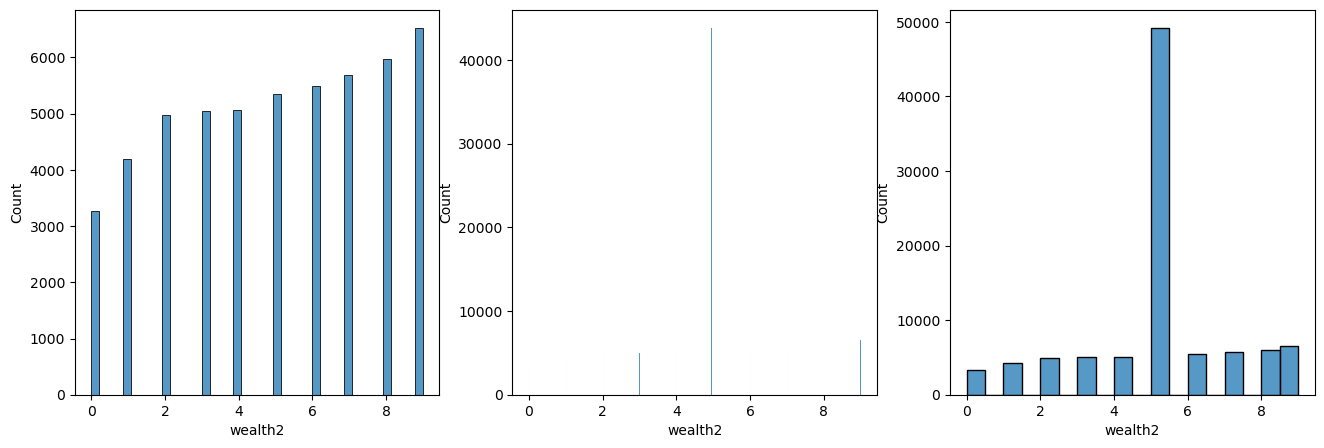

In [73]:
m_w = data['wealth2'].median()
avg_w = data['wealth2'].mean()
fig, ax = plt.subplots(1,3,figsize=(16,5))
sns.histplot(data['wealth2'], ax = ax[0])
sns.histplot(data['wealth2'].fillna(avg_w), ax = ax[1])
sns.histplot(data['wealth2'].fillna(m_w),ax = ax[2])
plt.show()

In [74]:
data['wealth2'] = data['wealth2'].fillna(m_w)

In [75]:
data['wealth2'].value_counts().sort_values(ascending = False)

5.0    49174
9.0     6523
8.0     5975
7.0     5684
6.0     5497
4.0     5074
3.0     5046
2.0     4971
1.0     4191
0.0     3277
Name: wealth2, dtype: int64

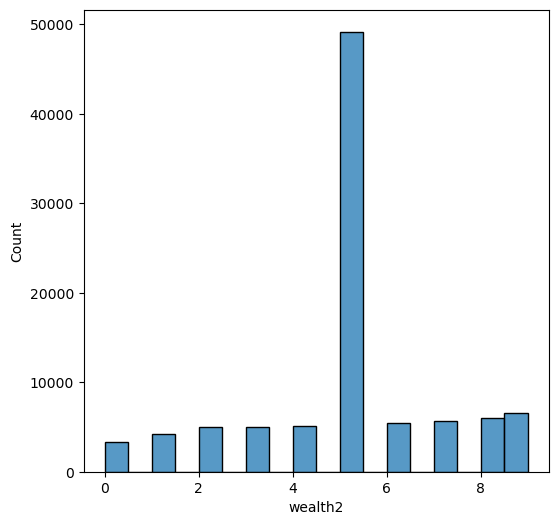

In [76]:
fig, ax = plt.subplots(1,figsize=(6,6))
sns.histplot(data['wealth2'])
plt.show()

In [77]:
columns_with_nulls = data.columns[data.isnull().any()]

null_count_by_column = data[columns_with_nulls].isnull().sum().sort_values(ascending=False)
print(null_count_by_column)

age         23665
income      21286
nextdate     9973
timelag      9973
cluster2      132
dtype: int64


In [78]:
data['age'].unique()

array([60., 46., nan, 70., 78., 38., 65., 75., 72., 44., 62., 82., 74.,
       54., 42., 84., 49., 69., 88., 30., 51., 66., 61., 68., 83., 45.,
       40., 48., 34., 80., 36., 50., 41., 71., 47., 33., 63., 64., 59.,
       77., 73., 87., 89., 86., 52., 76., 26., 58., 39., 92., 81., 56.,
       79., 37., 67., 57., 85., 53., 55., 94., 93., 43., 97., 90., 31.,
       29., 91., 28., 32., 35., 21., 27., 24., 96., 95., 20., 98., 19.,
       22., 25., 23., 13., 16., 18., 11.,  2.,  1.,  9., 17.,  7.,  6.,
       10.,  4., 14.,  8.,  3., 15.])

In [79]:
data['age'].value_counts().sort_values(ascending = False)

50.0    1930
76.0    1885
72.0    1813
68.0    1809
74.0    1801
        ... 
8.0        1
9.0        1
10.0       1
6.0        1
15.0       1
Name: age, Length: 96, dtype: int64

In [80]:
data['age'].isnull().sum()

23665

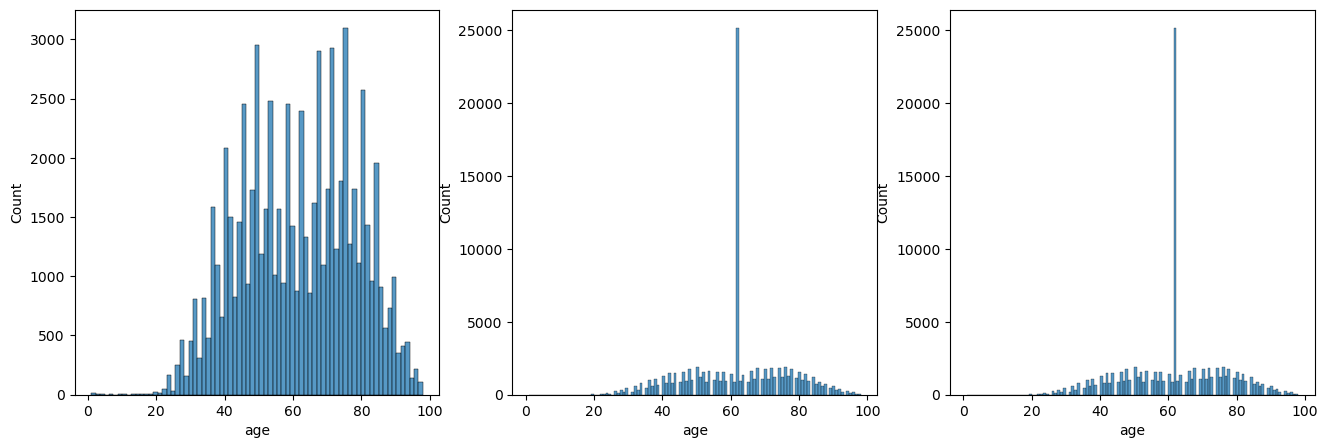

In [81]:
m_a = data['age'].median()
avg_a = data['age'].mean()
fig, ax = plt.subplots(1,3,figsize=(16,5))
sns.histplot(data['age'], ax = ax[0])
sns.histplot(data['age'].fillna(avg_a), ax = ax[1])
sns.histplot(data['age'].fillna(m_a),ax = ax[2])
plt.show()

In [82]:
data['age'] = data['age'].fillna(m_a)

In [83]:
data['age'].value_counts().sort_values(ascending = False)

62.0    25136
50.0     1930
76.0     1885
72.0     1813
68.0     1809
        ...  
8.0         1
9.0         1
10.0        1
6.0         1
15.0        1
Name: age, Length: 96, dtype: int64

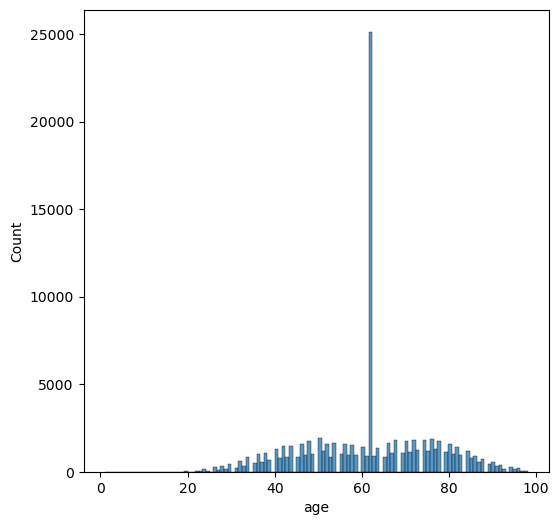

In [84]:
fig, ax = plt.subplots(1,figsize=(6,6))
sns.histplot(data['age'])
plt.show()

In [85]:
columns_with_nulls = data.columns[data.isnull().any()]

null_count_by_column = data[columns_with_nulls].isnull().sum().sort_values(ascending=False)
print(null_count_by_column)

income      21286
nextdate     9973
timelag      9973
cluster2      132
dtype: int64


In [86]:
data['income'].unique()

array([nan,  6.,  3.,  1.,  4.,  2.,  7.,  5.])

In [87]:
data['income'].value_counts().sort_values(ascending = False)

5.0    15451
2.0    13114
4.0    12732
1.0     9022
3.0     8558
6.0     7778
7.0     7471
Name: income, dtype: int64

In [88]:
data['income'].isnull().sum()

21286

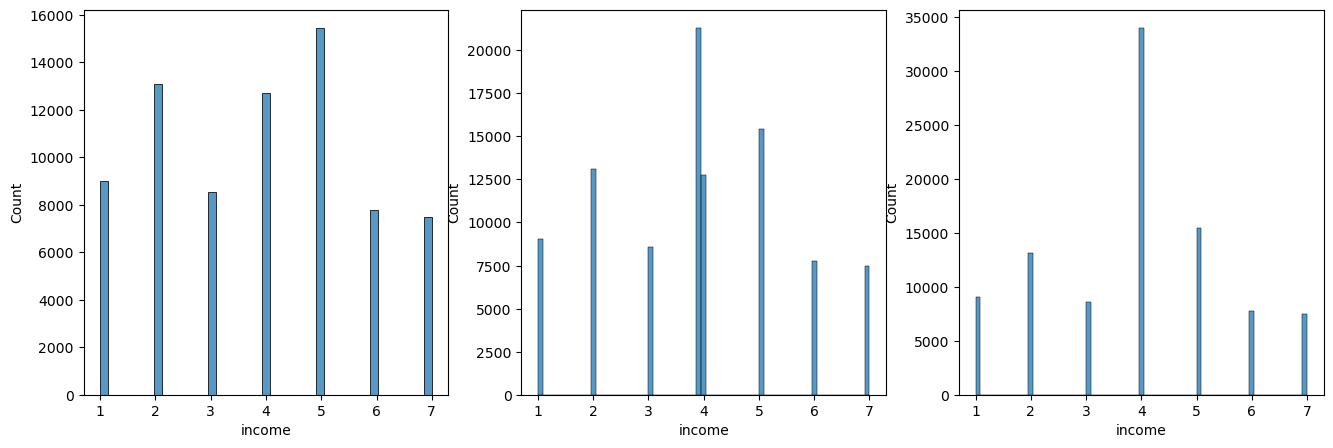

In [89]:
m_i = data['income'].median()
avg_i = data['income'].mean()
fig, ax = plt.subplots(1,3,figsize=(16,5))
sns.histplot(data['income'], ax = ax[0])
sns.histplot(data['income'].fillna(avg_i), ax = ax[1])
sns.histplot(data['income'].fillna(m_i),ax = ax[2])
plt.show()

In [90]:
data['income'] = data['income'].fillna(data['income'].median())

In [91]:
data['income'].value_counts().sort_values(ascending = False)

4.0    34018
5.0    15451
2.0    13114
1.0     9022
3.0     8558
6.0     7778
7.0     7471
Name: income, dtype: int64

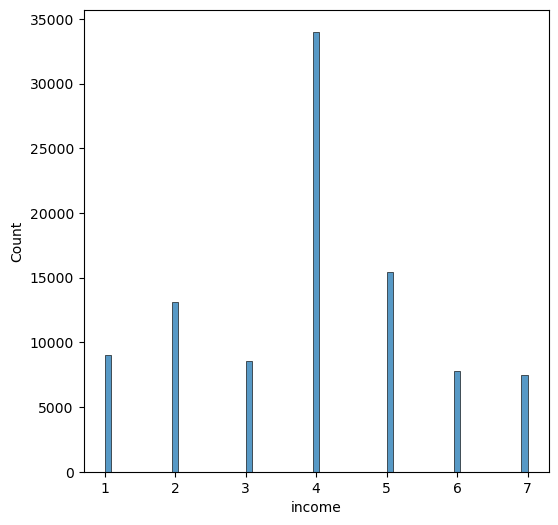

In [92]:
ig, ax = plt.subplots(1,figsize=(6,6))
sns.histplot(data['income'])
plt.show()

In [93]:
columns_with_nulls = data.columns[data.isnull().any()]

null_count_by_column = data[columns_with_nulls].isnull().sum().sort_values(ascending=False)
print(null_count_by_column)

nextdate    9973
timelag     9973
cluster2     132
dtype: int64


In [94]:
data['nextdate'].unique()

array([9003., 9504., 9101., 8711., 8005., 9407., 8705., 8809., 9404.,
         nan, 9512., 8910., 9211., 9306., 9509., 8906., 8707., 9507.,
       8801., 9312., 9303., 9301., 9304., 9112., 9109., 9602., 9505.,
       9205., 9102., 8706., 8703., 9601., 9401., 9210., 8804., 9111.,
       8904., 8902., 8710., 9411., 9409., 9110., 9503., 8704., 9209.,
       9001., 8803., 9405., 9410., 9202., 9212., 9104., 9012., 9402.,
       8802., 8811., 9408., 8812., 9310., 9502., 8612., 9510., 8405.,
       9511., 9207., 9506., 9508., 8708., 9412., 9204., 9309., 9406.,
       8807., 8912., 9105., 9008., 9302., 9103., 9603., 9107., 9203.,
       9011., 9006., 9007., 9106., 9501., 8702., 9206., 9004., 9311.,
       8907., 8806., 8709., 8909., 8911., 9010., 9308., 9702., 9403.,
       9005., 8901., 8903., 8905., 9305., 9208., 8712., 9201., 9009.,
       8408., 8810., 8808., 9610., 8805., 9307., 9002., 9108., 8701.,
       9608., 8611., 8908., 9605., 8607., 7804., 8608., 8610., 8505.,
       9609., 8205.,

In [95]:
data['nextdate'].value_counts().sort_values(ascending = False)

9504.0    2253
9412.0    1970
8703.0    1959
9512.0    1870
8612.0    1688
          ... 
8211.0       1
8203.0       1
8509.0       1
8601.0       1
8412.0       1
Name: nextdate, Length: 188, dtype: int64

In [96]:
data['nextdate'].isnull().sum()

9973

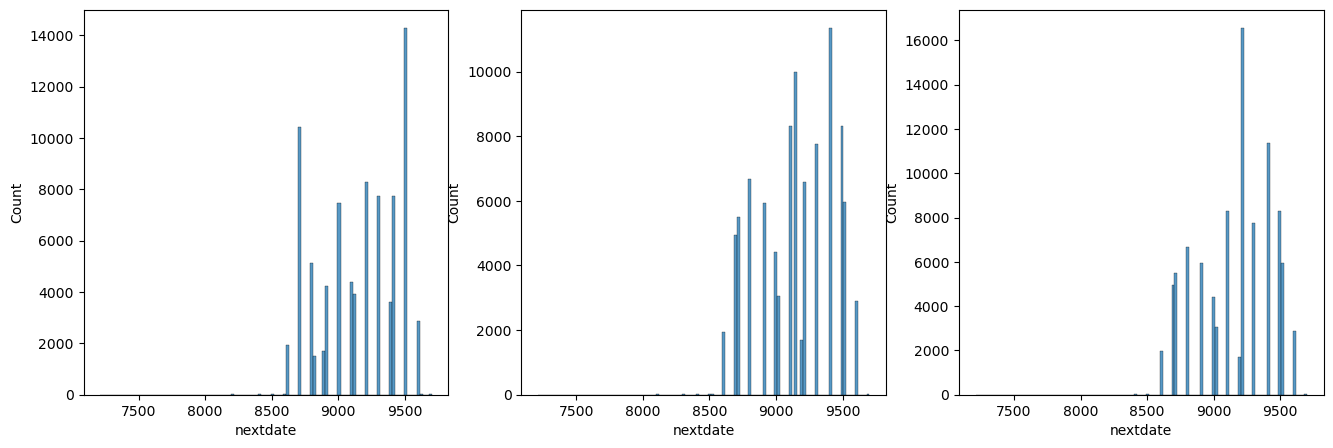

In [97]:
m_n = data['nextdate'].median()
avg_n = data['nextdate'].mean()
fig, ax = plt.subplots(1,3,figsize=(16,5))
sns.histplot(data['nextdate'], ax = ax[0])
sns.histplot(data['nextdate'].fillna(avg_n), ax = ax[1])
sns.histplot(data['nextdate'].fillna(m_n),ax = ax[2])
plt.show()

In [98]:
data['nextdate'] = data['nextdate'].fillna(data['nextdate'].median())

In [99]:
data['nextdate'].value_counts().sort_values(ascending = False)

9204.0    11066
9504.0     2253
9412.0     1970
8703.0     1959
9512.0     1870
          ...  
8211.0        1
8509.0        1
8203.0        1
8502.0        1
8412.0        1
Name: nextdate, Length: 188, dtype: int64

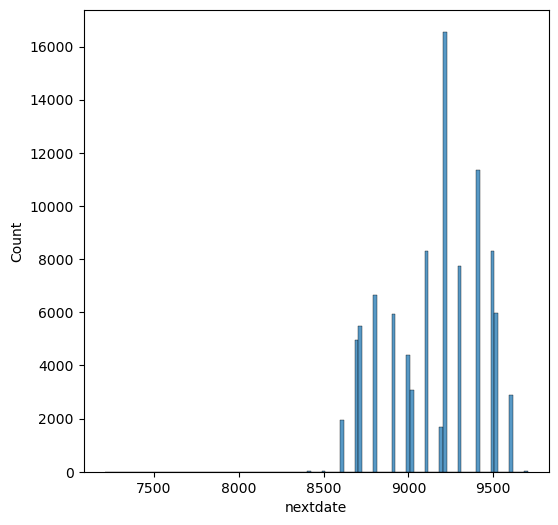

In [100]:
ig, ax = plt.subplots(1,figsize=(6,6))
sns.histplot(data['nextdate'])
plt.show()

In [101]:
columns_with_nulls = data.columns[data.isnull().any()]

null_count_by_column = data[columns_with_nulls].isnull().sum().sort_values(ascending=False)
print(null_count_by_column)

timelag     9973
cluster2     132
dtype: int64


In [102]:
data['timelag'].unique()

array([4.000e+00, 1.800e+01, 1.200e+01, 9.000e+00, 1.400e+01, 6.000e+00,
       8.000e+00, 7.000e+00,       nan, 3.000e+00, 5.000e+00, 1.000e+00,
       2.300e+01, 1.700e+01, 2.000e+00, 1.600e+01, 1.500e+01, 1.100e+01,
       1.000e+01, 2.000e+01, 0.000e+00, 2.100e+01, 1.300e+01, 1.900e+01,
       2.500e+01, 2.600e+01, 2.800e+01, 3.100e+01, 2.200e+01, 3.500e+01,
       2.700e+01, 3.400e+01, 4.200e+01, 2.900e+01, 3.000e+01, 4.900e+01,
       2.400e+01, 6.200e+01, 3.700e+01, 3.600e+01, 4.400e+01, 4.600e+01,
       3.900e+01, 4.500e+01, 3.800e+01, 3.300e+01, 4.800e+01, 4.700e+01,
       4.300e+01, 4.000e+01, 9.000e+01, 5.600e+01, 3.200e+01, 5.700e+01,
       5.800e+01, 5.900e+01, 4.100e+01, 5.000e+01, 5.100e+01, 5.500e+01,
       6.100e+01, 5.400e+01, 7.700e+01, 8.900e+01, 1.044e+03, 5.300e+01,
       4.420e+02, 5.200e+01, 1.088e+03])

In [103]:
data['timelag'].value_counts().sort_values(ascending = False)

5.0       8584
4.0       8490
3.0       8485
6.0       6648
2.0       6275
          ... 
89.0         1
77.0         1
61.0         1
58.0         1
1088.0       1
Name: timelag, Length: 68, dtype: int64

In [104]:
data['timelag'].isnull().sum()

9973

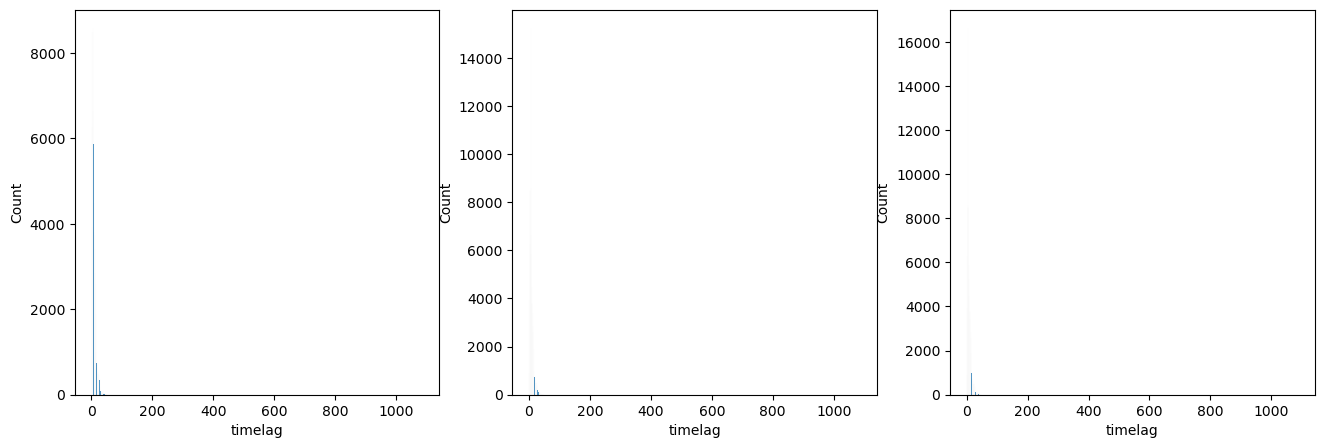

In [105]:
m_t = data['timelag'].median()
avg_t = data['timelag'].mean()
fig, ax = plt.subplots(1,3,figsize=(16,5))
sns.histplot(data['timelag'], ax = ax[0])
sns.histplot(data['timelag'].fillna(avg_t), ax = ax[1])
sns.histplot(data['timelag'].fillna(m_t),ax = ax[2])
plt.show()

In [106]:
data['timelag'] = data['timelag'].fillna(data['timelag'].mean())

In [107]:
data['timelag'].value_counts().sort_values(ascending = False)

8.093739       9973
5.000000       8584
4.000000       8490
3.000000       8485
6.000000       6648
               ... 
89.000000         1
1044.000000       1
53.000000         1
442.000000        1
1088.000000       1
Name: timelag, Length: 69, dtype: int64

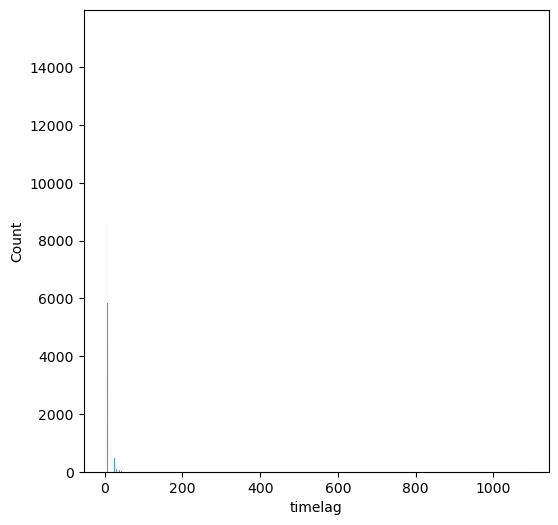

In [108]:
ig, ax = plt.subplots(1,figsize=(6,6))
sns.histplot(data['timelag'])
plt.show()

In [109]:
columns_with_nulls = data.columns[data.isnull().any()]

null_count_by_column = data[columns_with_nulls].isnull().sum().sort_values(ascending=False)
print(null_count_by_column)

cluster2    132
dtype: int64


In [110]:
data['cluster2'].unique()

array([39.,  1., 60., 41., 26., 16., 53., 38., 57., 34., 62., 23., 37.,
        7., 27., 56., 25., 61.,  3., 44., 17.,  5., 42.,  2., 15., 52.,
       14., 22., 33., 24., 11., 20., 21., 55., 35.,  9.,  4., 43., 54.,
       51., 13., 28., 10., 30., 45., 18., 46., 50., 48., 59., 58.,  8.,
       47., 36., 49., 19., 40., 12., 31., 32., 29., nan,  6.])

In [111]:
data['cluster2'].value_counts().sort_values(ascending = False)

13.0    3466
5.0     3154
57.0    2666
59.0    2653
15.0    2559
        ... 
30.0     647
46.0     644
29.0     569
40.0     369
6.0      211
Name: cluster2, Length: 62, dtype: int64

In [112]:
data['cluster2'].isnull().sum()

132

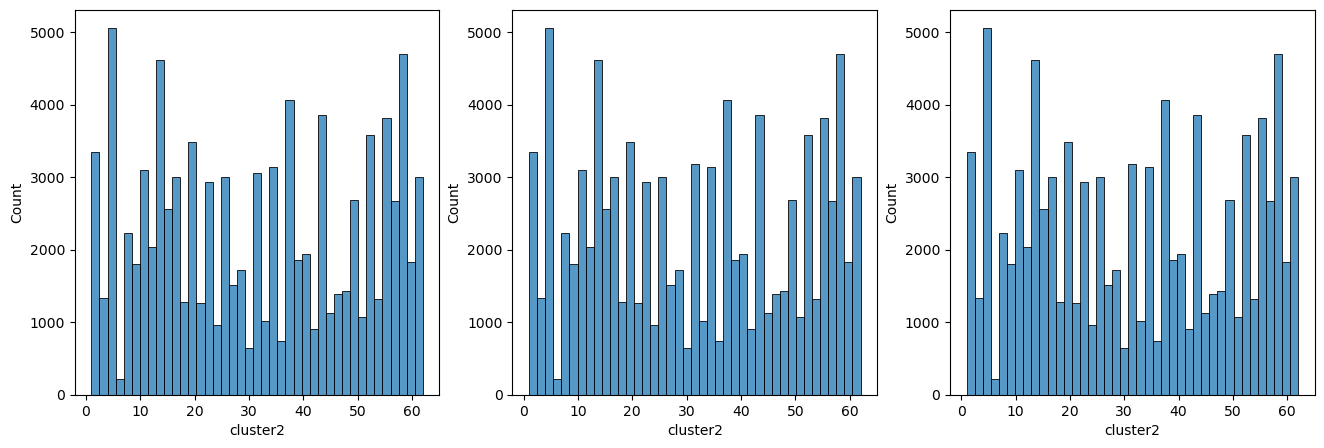

In [113]:
m_c = data['cluster2'].median()
avg_c = data['cluster2'].mean()
fig, ax = plt.subplots(1,3,figsize=(16,5))
sns.histplot(data['cluster2'], ax = ax[0])
sns.histplot(data['cluster2'].fillna(avg_c), ax = ax[1])
sns.histplot(data['cluster2'].fillna(m_c),ax = ax[2])
plt.show()

In [114]:
data['cluster2'] = data['cluster2'].fillna(data['cluster2'].mean())

In [115]:
data['cluster2'].value_counts().sort_values(ascending = False)

13.000000    3466
5.000000     3154
57.000000    2666
59.000000    2653
15.000000    2559
             ... 
46.000000     644
29.000000     569
40.000000     369
6.000000      211
31.533711     132
Name: cluster2, Length: 63, dtype: int64

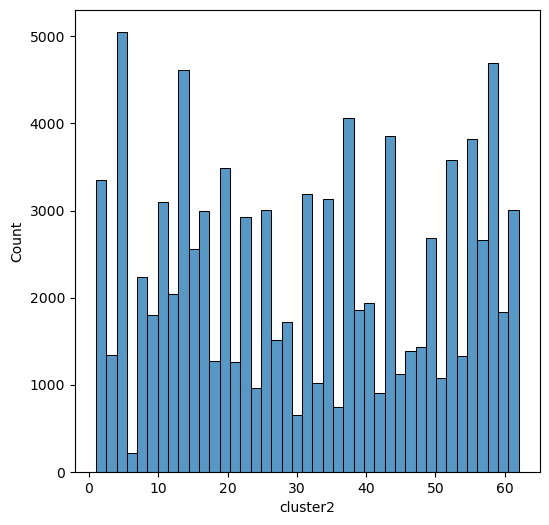

In [116]:
ig, ax = plt.subplots(1,figsize=(6,6))
sns.histplot(data['cluster2'])
plt.show()

In [117]:
Y = data[['target_b', 'target_d']]
Y.head()

,target_b,target_d
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


In [118]:
numerical = data.select_dtypes(np.number)
numerical = numerical.drop(columns = ['target_b', 'target_d'])
numerical.head()

,odatedw,tcode,dob,age,income,wealth1,hit,malemili,malevet,vietvets,wwiivets,localgov,stategov,fedgov,wealth2,pop901,pop902,pop903,pop90c1,pop90c2,pop90c3,pop90c4,pop90c5,eth1,eth2,eth3,eth4,eth5,eth6,eth7,eth8,eth9,eth10,eth11,eth12,eth13,eth14,eth15,eth16,age901,age902,age903,age904,age905,age906,age907,chil1,chil2,chil3,agec1,agec2,agec3,agec4,agec5,agec6,agec7,chilc1,chilc2,chilc3,chilc4,chilc5,hhage1,hhage2,hhage3,hhn1,hhn2,hhn3,hhn4,hhn5,hhn6,marr1,marr2,marr3,marr4,hhp1,hhp2,dw1,dw2,dw3,dw4,dw5,dw6,dw7,dw8,dw9,hv1,hv2,hv3,hv4,hu1,hu2,hu3,hu4,hu5,hhd1,hhd2,hhd3,hhd4,hhd5,hhd6,hhd7,hhd8,hhd9,hhd10,hhd11,hhd12,ethc1,ethc2,ethc3,ethc4,ethc5,ethc6,hvp1,hvp2,hvp3,hvp4,hvp5,hvp6,hur1,hur2,rhp1,rhp2,rhp3,rhp4,hupa1,hupa2,hupa3,hupa4,hupa5,hupa6,hupa7,rp1,rp2,rp3,rp4,msa,adi,dma,ic1,ic2,ic3,ic4,ic5,ic6,ic7,ic8,ic9,ic10,ic11,ic12,ic13,ic14,ic15,ic16,ic17,ic18,ic19,ic20,ic21,ic22,ic23,hhas1,hhas2,hhas3,hhas4,mc1,mc2,mc3,tpe1,tpe2,tpe3,tpe4,tpe5,tpe6,tpe7,tpe8,tpe9,pec1,pec2,tpe10,tpe11,tpe12,tpe13,lfc1,lfc2,lfc3,lfc4,lfc5,lfc6,lfc7,lfc8,lfc9,lfc10,occ1,occ2,occ3,occ4,occ5,occ6,occ7,occ8,occ9,occ10,occ11,occ12,occ13,eic1,eic2,eic3,eic4,eic5,eic6,eic7,eic8,eic9,eic10,eic11,eic12,eic13,eic14,eic15,eic16,oedc1,oedc2,oedc3,oedc4,oedc5,oedc6,oedc7,ec1,ec2,ec3,ec4,ec5,ec6,ec7,ec8,sec1,sec2,sec3,sec4,sec5,afc1,afc2,afc3,afc4,afc5,afc6,vc1,vc2,vc3,vc4,anc1,anc2,anc3,anc4,anc5,anc6,anc7,anc8,anc9,anc10,anc11,anc12,anc13,anc14,anc15,pobc1,pobc2,lsc1,lsc2,lsc3,lsc4,voc1,voc2,voc3,hc1,hc2,hc3,hc4,hc5,hc6,hc7,hc8,hc9,hc10,hc11,hc12,hc13,hc14,hc15,hc16,hc17,hc18,hc19,hc20,hc21,mhuc1,mhuc2,ac1,ac2,cardprom,maxadate,numprom,cardpm12,numprm12,ramntall,ngiftall,cardgift,minramnt,minrdate,maxramnt,maxrdate,lastgift,lastdate,fistdate,nextdate,timelag,avggift,controln,hphone_d,rfa_2f,cluster2
0,8901,0,3712,60.0,4.0,6.0,0,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.0,6.0,9.0,16,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,9702,32,6,13,47.0,3,1,10.0,9310,25.0,9512,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,2,1.0
2,9001,1,0,62.0,3.0,1.0,2,0,20,29,33,6,8,1,1.0,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,9,44,0.0,281.0,518.0,251,292,292,340,11576,32,18,20,15,12

In [119]:
round(numerical.describe(),2)

,odatedw,tcode,dob,age,income,wealth1,hit,malemili,malevet,vietvets,wwiivets,localgov,stategov,fedgov,wealth2,pop901,pop902,pop903,pop90c1,pop90c2,pop90c3,pop90c4,pop90c5,eth1,eth2,eth3,eth4,eth5,eth6,eth7,eth8,eth9,eth10,eth11,eth12,eth13,eth14,eth15,eth16,age901,age902,age903,age904,age905,age906,age907,chil1,chil2,chil3,agec1,agec2,agec3,agec4,agec5,agec6,agec7,chilc1,chilc2,chilc3,chilc4,chilc5,hhage1,hhage2,hhage3,hhn1,hhn2,hhn3,hhn4,hhn5,hhn6,marr1,marr2,marr3,marr4,hhp1,hhp2,dw1,dw2,dw3,dw4,dw5,dw6,dw7,dw8,dw9,hv1,hv2,hv3,hv4,hu1,hu2,hu3,hu4,hu5,hhd1,hhd2,hhd3,hhd4,hhd5,hhd6,hhd7,hhd8,hhd9,hhd10,hhd11,hhd12,ethc1,ethc2,ethc3,ethc4,ethc5,ethc6,hvp1,hvp2,hvp3,hvp4,hvp5,hvp6,hur1,hur2,rhp1,rhp2,rhp3,rhp4,hupa1,hupa2,hupa3,hupa4,hupa5,hupa6,hupa7,rp1,rp2,rp3,rp4,msa,adi,dma,ic1,ic2,ic3,ic4,ic5,ic6,ic7,ic8,ic9,ic10,ic11,ic12,ic13,ic14,ic15,ic16,ic17,ic18,ic19,ic20,ic21,ic22,ic23,hhas1,hhas2,hhas3,hhas4,mc1,mc2,mc3,tpe1,tpe2,tpe3,tpe4,tpe5,tpe6,tpe7,tpe8,tpe9,pec1,pec2,tpe10,tpe11,tpe12,tpe13,lfc1,lfc2,lfc3,lfc4,lfc5,lfc6,lfc7,lfc8,lfc9,lfc10,occ1,occ2,occ3,occ4,occ5,occ6,occ7,occ8,occ9,occ10,occ11,occ12,occ13,eic1,eic2,eic3,eic4,eic5,eic6,eic7,eic8,eic9,eic10,eic11,eic12,eic13,eic14,eic15,eic16,oedc1,oedc2,oedc3,oedc4,oedc5,oedc6,oedc7,ec1,ec2,ec3,ec4,ec5,ec6,ec7,ec8,sec1,sec2,sec3,sec4,sec5,afc1,afc2,afc3,afc4,afc5,afc6,vc1,vc2,vc3,vc4,anc1,anc2,anc3,anc4,anc5,anc6,anc7,anc8,anc9,anc10,anc11,anc12,anc13,anc14,anc15,pobc1,pobc2,lsc1,lsc2,lsc3,lsc4,voc1,voc2,voc3,hc1,hc2,hc3,hc4,hc5,hc6,hc7,hc8,hc9,hc10,hc11,hc12,hc13,hc14,hc15,hc16,hc17,hc18,hc19,hc20,hc21,mhuc1,mhuc2,ac1,ac2,cardprom,maxadate,numprom,cardpm12,numprm12,ramntall,ngiftall,cardgift,minramnt,minrdate,maxramnt,maxrdate,lastgift,lastdate,fistdate,nextdate,timelag,avggift,controln,hphone_d,rfa_2f,cluster2
count,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.0,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.0,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.0,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,954

In [120]:
categorical = data.select_dtypes([object])
categorical.head()

,osource,state,zip,mailcode,pvastate,noexch,recinhse,recp3,recpgvg,recsweep,mdmaud,domain,cluster,ageflag,homeownr,child03,child07,child12,child18,gender,datasrce,solp3,solih,major,geocode,collect1,veterans,bible,catlg,homee,pets,cdplay,stereo,pcowners,photo,crafts,fisher,gardenin,boats,walker,kidstuff,cards,plates,lifesrc,pepstrfl,rfa_2,rfa_3,rfa_4,rfa_5,rfa_6,rfa_7,rfa_8,rfa_9,rfa_10,rfa_11,rfa_12,rfa_13,rfa_14,rfa_15,rfa_16,rfa_17,rfa_18,rfa_19,rfa_20,rfa_21,rfa_22,rfa_23,rfa_24,rfa_2r,rfa_2a,mdmaud_r,mdmaud_f,mdmaud_a,geocode2
0,GRI,IL,61081,U,A,0,G,Y,O,H,XXXX,T2,36,D,Q,W,C,L,N,F,K,O,P,C,H,Z,D,K,F,B,Q,T,D,O,G,M,J,B,H,D,J,B,N,Q,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,U,A,0,G,Y,O,H,XXXX,S1,14,E,H,W,C,L,M,M,3,O,P,C,2,Z,D,K,F,B,Q,T,D,O,G,M,J,B,H,D,J,B,N,Q,T,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,B,B,U,L1E,D,K,N1E,N1E,N1E,N1E,N,F1E,L,G,X,X,X,A
2,AMH,NC,27017,U,A,0,G,Y,O,H,XXXX,R2,43,D,U,W,C,L,N,M,3,O,P,C,H,Z,D,K,F,B,Q,T,D,O,G,M,J,B,H,D,J,B,N,Q,X,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,X,S4F,S4F,S4F,S4F,S4F,S4F,D,S4D,S4D,B,T,S4D,S4D,S3D,L,E,X,X,X,C
3,BRY,CA,95953,U,A,0,G,Y,O,H,XXXX,R2,44,E,U,W,C,L,N,F,3,O,P,C,H,Z,D,K,F,B,Q,T,D,O,G,M,J,B,H,D,J,B,N,Q,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,X,S4E,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1D,N,F,L,E,X,X,X,C
4,W,FL,33176,U,A,0,X,X,O,H,XXXX,S2,16,E,H,W,C,L,N,F,3,O,12,C,H,Z,D,Y,Y,B,Q,T,Y,O,G,Y,J,Y,H,Y,J,Y,N,3,T,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,A1E,L1D,L3D,U,L3D,A2D,A2D,A3D,A3D,A3D,I4E,A3D,A3D,L,F,X,X,X,A


In [121]:
round(categorical.describe(),2)

,osource,state,zip,mailcode,pvastate,noexch,recinhse,recp3,recpgvg,recsweep,mdmaud,domain,cluster,ageflag,homeownr,child03,child07,child12,child18,gender,datasrce,solp3,solih,major,geocode,collect1,veterans,bible,catlg,homee,pets,cdplay,stereo,pcowners,photo,crafts,fisher,gardenin,boats,walker,kidstuff,cards,plates,lifesrc,pepstrfl,rfa_2,rfa_3,rfa_4,rfa_5,rfa_6,rfa_7,rfa_8,rfa_9,rfa_10,rfa_11,rfa_12,rfa_13,rfa_14,rfa_15,rfa_16,rfa_17,rfa_18,rfa_19,rfa_20,rfa_21,rfa_22,rfa_23,rfa_24,rfa_2r,rfa_2a,mdmaud_r,mdmaud_f,mdmaud_a,geocode2
count,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412
unique,896,57,19938,2,3,6,2,2,2,2,28,17,54,3,3,4,4,4,4,7,4,5,8,2,8,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,2,14,71,64,41,109,106,109,107,94,101,107,87,95,34,123,118,122,108,80,102,117,87,97,1,4,5,4,5,4
top,MBC,CA,85351,U,A,0,G,Y,O,H,XXXX,R2,40,E,H,W,C,L,N,F,3,O,P,C,H,Z,D,K,F,B,Q,T,D,O,G,M,J,B,H,D,J,B,N,Q,T,L1F,A1F,A1F,C,A1F,A1F,A1F,Z,X,K,A1F,B,B,U,C,D,K,V,B,T,G,N,F,L,F,X,X,X,A
freq,4539,17343,61,94013,93954,61203,88709,93395,95298,93795,95118,13623,3979,57344,52354,94266,93846,93601,92565,51277,43549,95232,89212,95118,80168,90210,84986,86541,87547,94525,81086,83158,82618,84931,90626,87236,88282,82010,93384,84911,93876,94371,94852,54032,50143,30380,21950,21818,33590,15696,10954,11312,11245,32748,10422,9857,40219,18867,65477,20417,27650,21263,24492,50200,35212,25648,56274,36973,95412,46964,95118,95118,95118,34803


In [127]:
numerical.to_csv('numerical7_02.csv')
categorical.to_csv('categorical7_02.csv')
Y.to_csv('target7_02.csv')